### 基于指数衰减的动态奖励函数

场景设定​​：

智能体在股票交易中，需平衡短期收益与长期稳定性。
设计一个奖励函数，对短期高收益给予激励，但随时间推移逐渐衰减奖励信号，防止过度投机。

{0.05: array([0.1       , 0.09512294, 0.09048374, 0.0860708 , 0.08187308,
       0.07788008, 0.07408182, 0.07046881, 0.067032  , 0.06376282,
       0.06065307, 0.05769498, 0.05488116, 0.05220458, 0.04965853,
       0.04723666, 0.0449329 , 0.04274149, 0.04065697, 0.0386741 ,
       0.03678794, 0.03499377, 0.03328711, 0.03166368, 0.03011942,
       0.02865048, 0.02725318, 0.02592403, 0.0246597 , 0.02345703,
       0.02231302, 0.0212248 , 0.02018965, 0.01920499, 0.01826835,
       0.01737739, 0.01652989, 0.01572372, 0.01495686, 0.01422741,
       0.01353353, 0.01287349, 0.01224564, 0.01164842, 0.01108032,
       0.01053992, 0.01002588, 0.00953692, 0.0090718 , 0.00862936]), 0.1: array([0.1       , 0.09048374, 0.08187308, 0.07408182, 0.067032  ,
       0.06065307, 0.05488116, 0.04965853, 0.0449329 , 0.04065697,
       0.03678794, 0.03328711, 0.03011942, 0.02725318, 0.0246597 ,
       0.02231302, 0.02018965, 0.01826835, 0.01652989, 0.01495686,
       0.01353353, 0.01224564, 0.01108032, 0.010

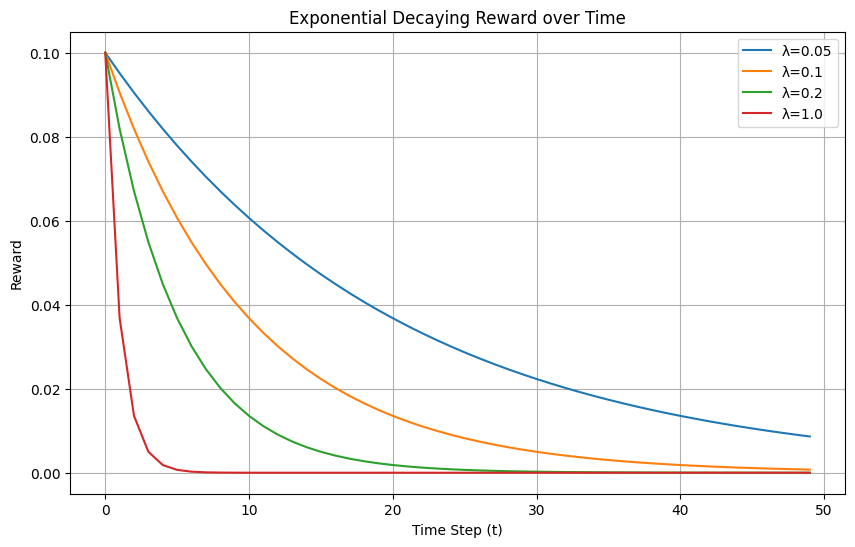

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
lambda_params = [0.05, 0.1, 0.2,1.0]  # 不同衰减系数
time_steps = np.arange(0, 50)      # 时间步0~49
R_t = 0.1                          # 假设每步收益固定为10%

# 计算不同lambda下的衰减奖励
rewards = {}
for lam in lambda_params:
    rewards[lam] = R_t * np.exp(-lam * time_steps)
print( rewards)
# 可视化
plt.figure(figsize=(10, 6))
for lam, reward_curve in rewards.items():
    plt.plot(time_steps, reward_curve, label=f"λ={lam}")

plt.title("Exponential Decaying Reward over Time")
plt.xlabel("Time Step (t)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

### 非对称风险惩罚
​- ​场景进阶​​：对亏损（Rt <0）施加指数级惩罚，而对收益使用线性奖励。

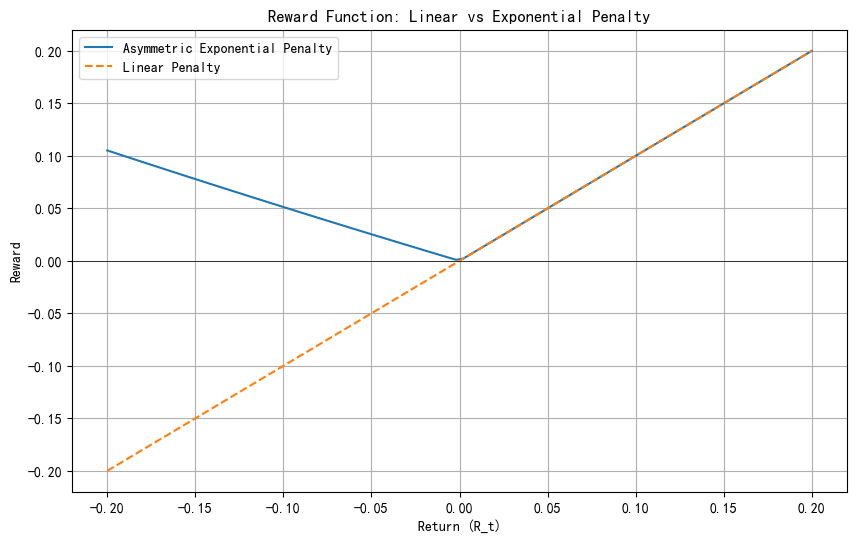

In [2]:
# 风险厌恶系数
eta = 0.5

# 生成收益率序列（含正负）
R_t_values = np.linspace(-0.2, 0.2, 100)  # 收益率从-20%到+20%

# 计算奖励
rewards_asymmetric = np.where(
    R_t_values >= 0,
    R_t_values,                            # 收益保持线性
    np.exp(eta * np.abs(R_t_values)) - 1   # 亏损指数惩罚
)

# 对比线性惩罚（例如 penalty = |R_t|）
rewards_linear = np.where(
    R_t_values >= 0,
    R_t_values,
    -np.abs(R_t_values)
)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(R_t_values, rewards_asymmetric, label="Asymmetric Exponential Penalty")
plt.plot(R_t_values, rewards_linear, label="Linear Penalty", linestyle="--")
plt.axhline(0, color="black", linewidth=0.5)
plt.title("Reward Function: Linear vs Exponential Penalty")
plt.xlabel("Return (R_t)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

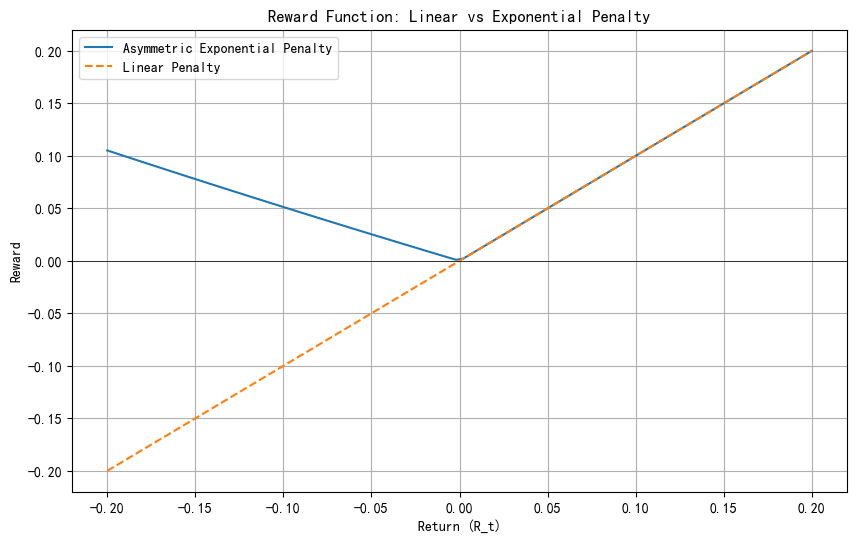

In [6]:
# 风险厌恶系数
eta = 0.5

# 生成收益率序列（含正负）
R_t_values = np.linspace(-0.2, 0.2, 100)  # 收益率从-20%到+20%

# 计算奖励
rewards_asymmetric = np.where(
    R_t_values >= 0,
    R_t_values,                            # 收益保持线性
    np.exp(eta * np.abs(R_t_values)) - 1   # 亏损指数惩罚
)

# 对比线性惩罚（例如 penalty = |R_t|）
rewards_linear = np.where(
    R_t_values >= 0,
    R_t_values,
    -np.abs(R_t_values)
)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(R_t_values, rewards_asymmetric, label="Asymmetric Exponential Penalty")
plt.plot(R_t_values, rewards_linear, label="Linear Penalty", linestyle="--")
plt.axhline(0, color="black", linewidth=0.5)
plt.title("Reward Function: Linear vs Exponential Penalty")
plt.xlabel("Return (R_t)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

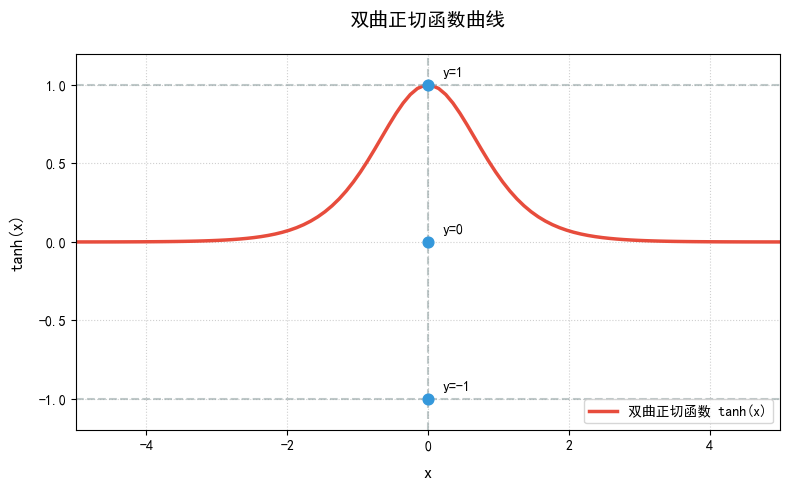

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文显示和字体
rcParams['font.family'] = 'SimHei'  # 设置中文字体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 生成x轴数据（从-5到5的100个点）
x = np.linspace(-5, 5, 100)
y = 1- np.tanh(x)**2  # 计算双曲正切值

# 创建画布和坐标轴
plt.figure(figsize=(8, 5), dpi=100)
ax = plt.gca()

# 绘制曲线
plt.plot(x, y, 
         linewidth=2.5, 
         color='#E74C3C', 
         label='双曲正切函数 tanh(x)')

# 标记关键点
for val in [-1, 0, 1]:
    plt.scatter(0, val, s=60, color='#3498DB', zorder=5)
    plt.text(0.2, val+0.05, f'y={val}', fontsize=10)

# 添加辅助线
plt.axhline(y=1, linestyle='--', color='#95A5A6', alpha=0.6)
plt.axhline(y=-1, linestyle='--', color='#95A5A6', alpha=0.6)
plt.axvline(x=0, linestyle='--', color='#95A5A6', alpha=0.6)

# 设置坐标轴范围
plt.xlim(-5, 5)
plt.ylim(-1.2, 1.2)

# 添加标签和标题
plt.title('双曲正切函数曲线', fontsize=14, pad=20)
plt.xlabel('x', fontsize=12, labelpad=10)
plt.ylabel('tanh(x)', fontsize=12, labelpad=10)

# 显示图例和网格
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)

# 显示图形
plt.tight_layout()
plt.show()

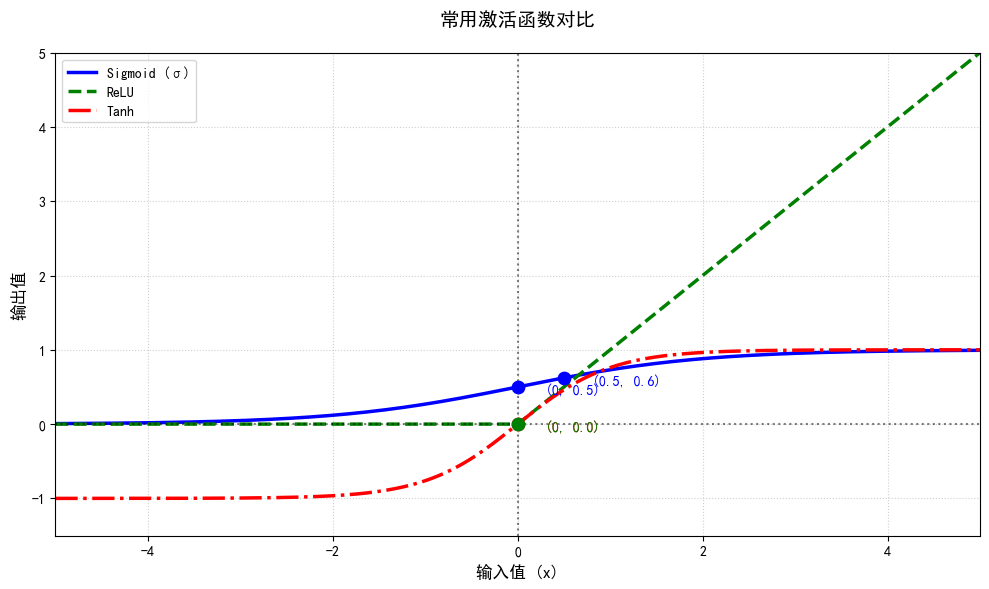

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文显示和字体
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 生成x轴数据（从-5到5的200个点）
x = np.linspace(-5, 5, 200)

# 定义三个激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# 计算函数值
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# 创建画布和子图
plt.figure(figsize=(10, 6), dpi=100)

# 绘制三条曲线
plt.plot(x, y_sigmoid, 'b-', linewidth=2.5, label='Sigmoid (σ)')
plt.plot(x, y_relu, 'g--', linewidth=2.5, label='ReLU')
plt.plot(x, y_tanh, 'r-.', linewidth=2.5, label='Tanh')

# 标记关键点
for func, color, points in [
    (sigmoid, 'blue', [0, 0.5]),
    (tanh, 'red', [0]),
    (relu, 'green', [0])
]:
    for px in points:
        py = func(px)
        plt.scatter(px, py, s=80, color=color, zorder=5)
        plt.text(px+0.3, py-0.1, f'({px}, {py:.1f})', color=color, fontsize=10)

# 添加辅助线
plt.axhline(y=0, color='k', linestyle=':', alpha=0.5)
plt.axvline(x=0, color='k', linestyle=':', alpha=0.5)

# 设置坐标轴范围
plt.xlim(-5, 5)
plt.ylim(-1.5, 5)

# 添加标签和标题
plt.title('常用激活函数对比', fontsize=14, pad=20)
plt.xlabel('输入值 (x)', fontsize=12)
plt.ylabel('输出值', fontsize=12)

# 显示图例和网格
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)

# 显示图形
plt.tight_layout()
plt.show()

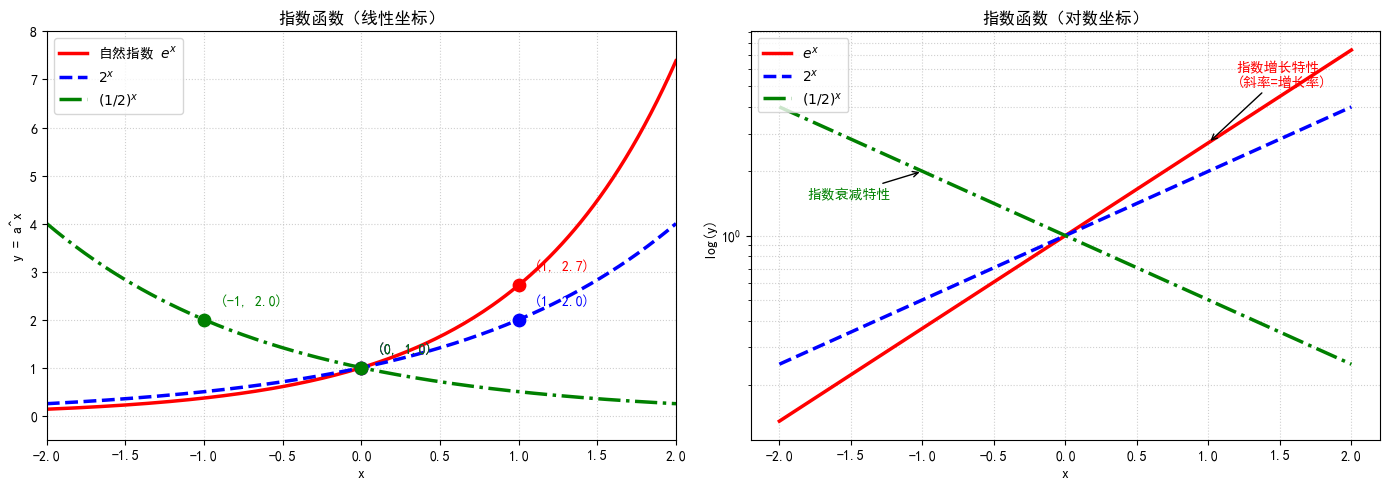

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文显示和字体
rcParams['font.family'] = 'SimHei'
rcParams['axes.unicode_minus'] = False

# 生成x轴数据（从-2到2的200个点）
x = np.linspace(-2, 2, 200)

# 定义指数函数
def exp_func(x, a=1):
    return a**x

# 计算不同底数的指数曲线
y_e = np.exp(x)       # 自然指数 e^x
y_2 = exp_func(x, 2)  # 2^x
y_half = exp_func(x, 0.5)  # 0.5^x (即衰减曲线)

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ========== 线性坐标图 ==========
ax1.plot(x, y_e, 'r-', linewidth=2.5, label='自然指数 $e^x$')
ax1.plot(x, y_2, 'b--', linewidth=2.5, label='$2^x$')
ax1.plot(x, y_half, 'g-.', linewidth=2.5, label='$(1/2)^x$')

# 标记关键点
for func, color, points in [
    (np.exp, 'red', [0, 1]),
    (lambda x: 2**x, 'blue', [0, 1]),
    (lambda x: 0.5**x, 'green', [0, -1])
]:
    for px in points:
        py = func(px)
        ax1.scatter(px, py, s=80, color=color, zorder=5)
        ax1.text(px+0.1, py+0.3, f'({px}, {py:.1f})', color=color, fontsize=10)

# 设置坐标轴
ax1.set_xlim(-2, 2)
ax1.set_ylim(-0.5, 8)
ax1.set_title('指数函数（线性坐标）', fontsize=12)
ax1.set_xlabel('x', fontsize=10)
ax1.set_ylabel('y = a^x', fontsize=10)
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend(loc='upper left')

# ========== 对数坐标图 ==========
ax2.semilogy(x, y_e, 'r-', linewidth=2.5, label='$e^x$')
ax2.semilogy(x, y_2, 'b--', linewidth=2.5, label='$2^x$')
ax2.semilogy(x, y_half, 'g-.', linewidth=2.5, label='$(1/2)^x$')

# 标记特性
ax2.annotate('指数增长特性\n(斜率=增长率)', 
             xy=(1, np.exp(1)), xytext=(1.2, 5),
             arrowprops=dict(arrowstyle='->'), color='red')
ax2.annotate('指数衰减特性', 
             xy=(-1, 2), xytext=(-1.8, 1.5),
             arrowprops=dict(arrowstyle='->'), color='green')

ax2.set_title('指数函数（对数坐标）', fontsize=12)
ax2.set_xlabel('x', fontsize=10)
ax2.set_ylabel('log(y)', fontsize=10)
ax2.grid(True, which='both', linestyle=':', alpha=0.6)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

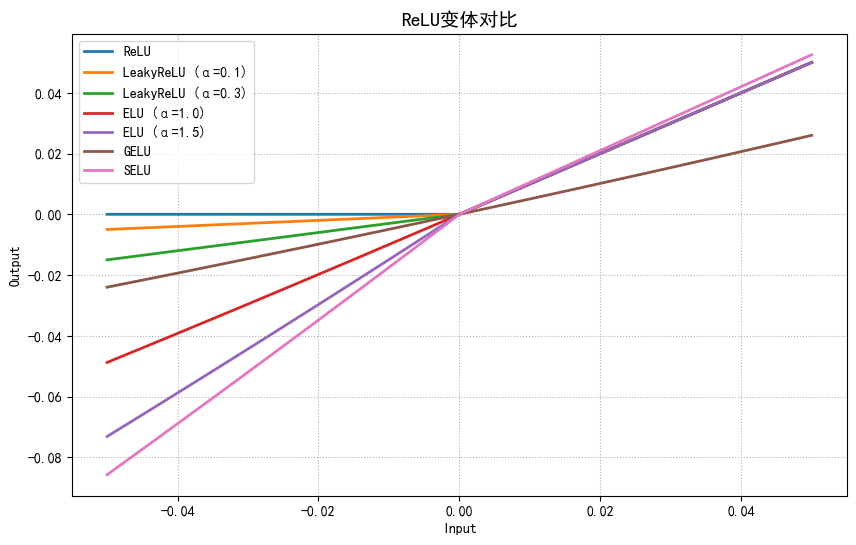

In [30]:

def relu(x):
    return np.maximum(0, x)
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

def swish(x, beta=1.0):
    return x * (1 / (1 + np.exp(-beta * x)))
def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

x = np.linspace(-0.05, 0.05, 200)
functions = {
    "ReLU": relu(x),
    "LeakyReLU (α=0.1)": leaky_relu(x, 0.1),
    "LeakyReLU (α=0.3)": leaky_relu(x, 0.3),
    "ELU (α=1.0)": elu(x,1.0),
    "ELU (α=1.5)": elu(x,1.5),
    "GELU": gelu(x),
    "SELU": selu(x),
    # "Swish": swish(x),
    # "Mish": mish(x)
}

plt.figure(figsize=(10, 6))
for name, y in functions.items():
    plt.plot(x, y, label=name, linewidth=2)

plt.title("ReLU变体对比", fontsize=14)
plt.xlabel("Input"), plt.ylabel("Output")
plt.grid(True, linestyle=":")
plt.legend(loc="upper left")
plt.show()

In [19]:
print(np.log(0.20))
print(np.log(0.15))
print(np.log(0.00001))
print(np.log(10))

c = 130
p=120
print(np.log(c / p))

-1.6094379124341003
-1.8971199848858813
-11.512925464970229
2.302585092994046
0.08004270767353636
